<a href="https://colab.research.google.com/github/DesireHernandez/Women-Diabetes-Prediction/blob/main/DiabetesPredictionProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Importing Data**

In [ ]:
import pandas as pd
df = pd.read_csv( 'diabetes_prediction_dataset.csv' )
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


# **Cleaning Data**

In [ ]:
import re
df = pd.read_csv( 'diabetes_prediction_dataset.csv' )
X = df.drop( columns = [ 'smoking_history', 'heart_disease', 'hypertension' ] )
# explain regex
X = X.loc[ X[ 'gender' ].str.contains( 'Female', regex = True ) ]
# removed duplicates
X = X.drop_duplicates( keep = False )
# dropped diabetes
Y = X.drop( columns = [ 'diabetes' ] )
# only has diabetes column
Z = X[ 'diabetes' ]

# **Saving Our New Data**

In [ ]:
X.to_csv( 'cleaned_diabetes_dataset.csv' )
Y.to_csv( 'modified_diabetes_dataset.csv' )
Z.to_csv( 'only_diabetes_results.csv' )

0        0
3        0
6        1
7        0
9        0
        ..
99993    0
99994    0
99996    0
99998    0
99999    0
Name: diabetes, Length: 49114, dtype: int64

# **Training & Testing**

In [ ]:
from numpy.core.multiarray import zeros
from sklearn.tree import DecisionTreeClassifier
from sklearn import preprocessing

# Changing the gender column to numeric value ( 0 ) instead of string
label_encoder = preprocessing.LabelEncoder()
Y[ 'gender' ] = label_encoder.fit_transform( Y[ 'gender' ] )
# Making a prediction with random factor values
model = DecisionTreeClassifier()
model.fit( Y, Z )
predictions = model.predict ( [ [ 0, 1, 27.32, 6.3, 100 ] ] )
predictions

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# use 80% of the data to train on and 20% percent to test on
Y_train, Y_test, Z_train, Z_test = train_test_split ( Y, Z, test_size = 0.2 )
model.fit ( Y_train, Z_train )
predictions = model.predict ( Y_test )
# Gets the accuracy of our testing
score = accuracy_score ( Z_test, predictions )
score

0.9489972513488751

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix( Z_test, predictions )

array([[8675,  281],
       [ 220,  647]])

# **Installing Pycaret**

In [ ]:
pip install pycaret

In [ ]:
pip install markupsafe==2.0.1

  Attempting uninstall: markupsafe
    Found existing installation: MarkupSafe 2.1.3
    Uninstalling MarkupSafe-2.1.3:
      Successfully uninstalled MarkupSafe-2.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
werkzeug 2.2.3 requires MarkupSafe>=2.1.1, but you have markupsafe 2.0.1 which is incompatible.


In [ ]:
pip install jinja2

# **New Section**

In [ ]:
import jinja2

In [ ]:
dataset = pd.read_csv( 'cleaned_diabetes_dataset.csv' )
dataset = dataset.drop( columns = [ 'Unnamed: 0' ] )
dataset

,gender,age,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,25.19,6.6,140,0
1,Female,36.0,23.45,5.0,155,0
2,Female,44.0,19.31,6.5,200,1
3,Female,79.0,23.86,5.7,85,0
4,Female,32.0,27.32,5.0,100,0
...,...,...,...,...,...,...
49109,Female,40.0,40.69,3.5,155,0
49110,Female,36.0,24.60,4.8,145,0
49111,Female,2.0,17.37,6.5,100,0
49112,Female,24.0,35.42,4.0,100,0


In [ ]:
# use 80% of the data to train on and 20% percent to test on
train_data = dataset.sample( frac = 0.80, random_state = 345 )
test_data = dataset.drop( train_data.index )
train_data.reset_index( inplace = True, drop = True )
test_data.reset_index( inplace = True, drop = True )

In [ ]:
#Print the number of rows and columns of the new data set
print( 'Data used to train the model has ' +str( train_data.shape[0] )+' rows and ' +str( train_data.shape[1] )+' columns' )
print( 'Unseen data (a.k.a test data) for making predictions or classifcation has '+str( test_data.shape[0] )+' rows and '+str( test_data.shape[1] )+' colums' )

Data used to train the model has 39291 rows and 6 columns
Unseen data (a.k.a test data) for making predictions or classifcation has 9823 rows and 6 colums


In [ ]:
from pycaret.classification import *
s = setup( data = train_data, target = 'diabetes', session_id = 345 )

,Description,Value
0,Session id,345
1,Target,diabetes
2,Target type,Binary
3,Original data shape,"(39291, 6)"
4,Transformed data shape,"(39291, 6)"
5,Transformed train set shape,"(27503, 6)"
6,Transformed test set shape,"(11788, 6)"
7,Numeric features,4
8,Categorical features,1
9,Preprocess,True


In [ ]:
#compare models
model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
ada,Ada Boost Classifier,0.9701,0.9767,0.6769,0.9775,0.7996,0.7840,0.7997,0.6240
gbc,Gradient Boosting Classifier,0.9700,0.9766,0.6692,0.9874,0.7973,0.7818,0.7993,1.7440
lightgbm,Light Gradient Boosting Machine,0.9696,0.9742,0.6773,0.9682,0.7967,0.7808,0.7956,0.3600
xgboost,Extreme Gradient Boosting,0.9690,0.9738,0.6864,0.9486,0.7962,0.7799,0.7921,1.1290
rf,Random Forest Classifier,0.9672,0.9581,0.6861,0.9227,0.7868,0.7694,0.7795,1.5450
et,Extra Trees Classifier,0.9625,0.9445,0.6835,0.8626,0.7625,0.7424,0.7485,1.2460
lr,Logistic Regression,0.9589,0.9576,0.6114,0.8881,0.7235,0.7021,0.7168,0.4090
lda,Linear Discriminant Analysis,0.9562,0.9516,0.5637,0.9052,0.6939,0.6718,0.6941,0.1390
nb,Naive Bayes,0.9557,0.9468,0.5905,0.8649,0.7012,0.6782,0.6929,0.1170
svm,SVM - Linear Kernel,0.9515,0.0000,0.6077,0.8236,0.6860,0.6608,0.6768,0.3620


Processing:   0%|          | 0/65 [00:00<?, ?it/s]

In [ ]:
#create the random forest model
forest = create_model( 'rf' )

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.9609,0.9532,0.6227,0.9043,0.7375,0.7172,0.7318
1,0.9690,0.9537,0.7179,0.9116,0.8033,0.7867,0.7933
2,0.9661,0.9599,0.6850,0.9078,0.7808,0.7628,0.7717
3,0.9680,0.9470,0.6813,0.9394,0.7898,0.7730,0.7847
4,0.9677,0.9571,0.6923,0.9220,0.7908,0.7737,0.7830
5,0.9699,0.9686,0.7033,0.9412,0.8050,0.7891,0.7990
6,0.9677,0.9558,0.6996,0.9139,0.7925,0.7753,0.7835
7,0.9693,0.9641,0.7033,0.9320,0.8017,0.7854,0.7945
8,0.9683,0.9649,0.6850,0.9397,0.7924,0.7757,0.7871


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

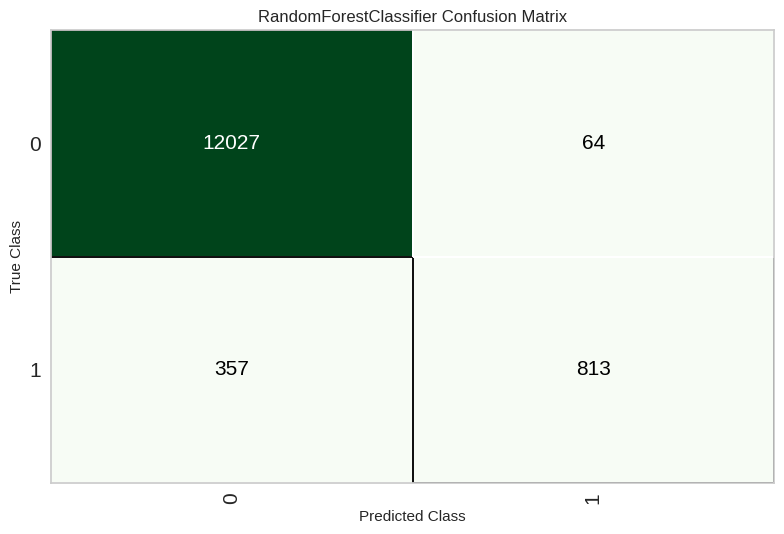

In [ ]:
#confusion matrix
plot_model( forest, plot='confusion_matrix' )

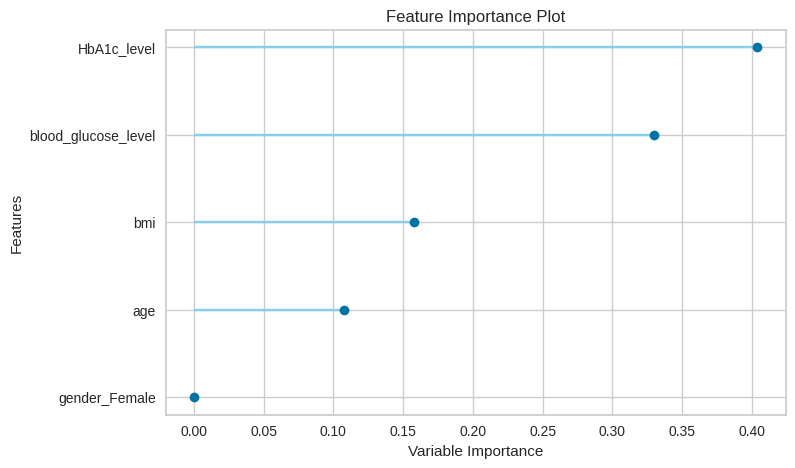

In [ ]:
#Plot the feature importance
plot_model( forest, plot = 'feature' )

In [ ]:
#evaluate the model
evaluate_model( forest )

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [ ]:
#show the models predictions on the test data
predictions = predict_model( forest, data = test_data )
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Random Forest Classifier,0.9697,0.9653,0.7234,0.9220,0.8107,0.7944,0.8014


,gender,age,bmi,HbA1c_level,blood_glucose_level,diabetes,prediction_label,prediction_score
0,Female,4.0,13.990000,4.0,140,0,0,1.00
1,Female,15.0,21.760000,4.5,130,0,0,1.00
2,Female,77.0,32.020000,5.0,159,0,0,1.00
3,Female,44.0,24.930000,6.1,100,0,0,1.00
4,Female,53.0,27.320000,7.0,159,1,1,0.99
...,...,...,...,...,...,...,...,...
4906,Female,3.0,27.320000,6.0,140,0,0,1.00
4907,Female,67.0,44.389999,6.0,145,0,0,0.66
4908,Female,37.0,28.950001,4.5,200,0,0,1.00
4909,Female,78.0,36.910000,5.8,155,0,0,0.84


# **Added Data Analysis**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

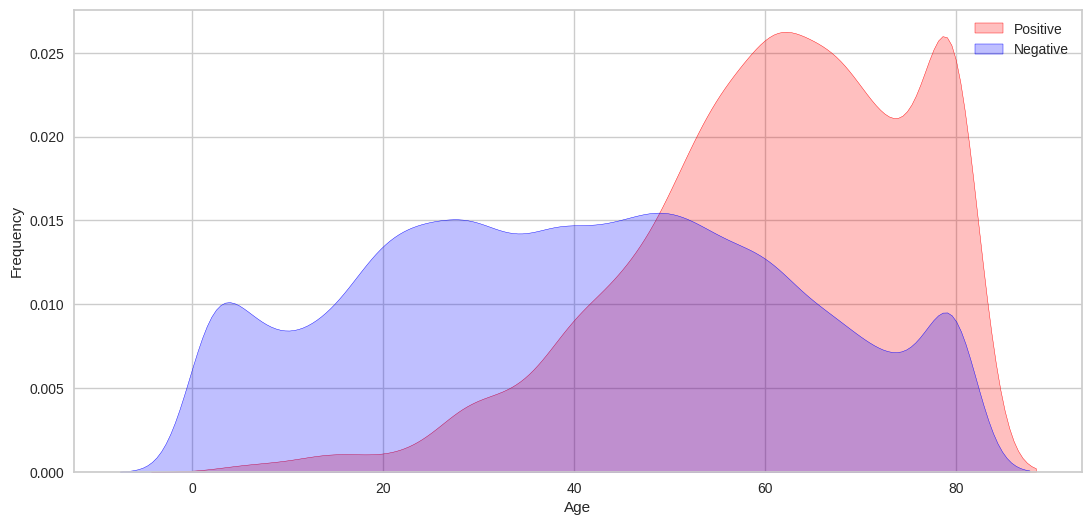

In [ ]:
plt.figure( figsize = ( 13, 6 ) )
g = sns.kdeplot( dataset[ "age" ][ dataset[ "diabetes" ] == 1 ],
                color = "Red", shade = True )
g = sns.kdeplot( dataset[ "age" ][ dataset[ "diabetes" ] == 0 ],
                ax = g, color = "Blue", shade = True )
g.set_xlabel( "Age" )
g.set_ylabel( "Frequency" )
g.legend( [ "Positive", "Negative" ] )

# POSTIVIE = the age that does have diabetes
# NEGATIVE = the age that does NOT have diabetes

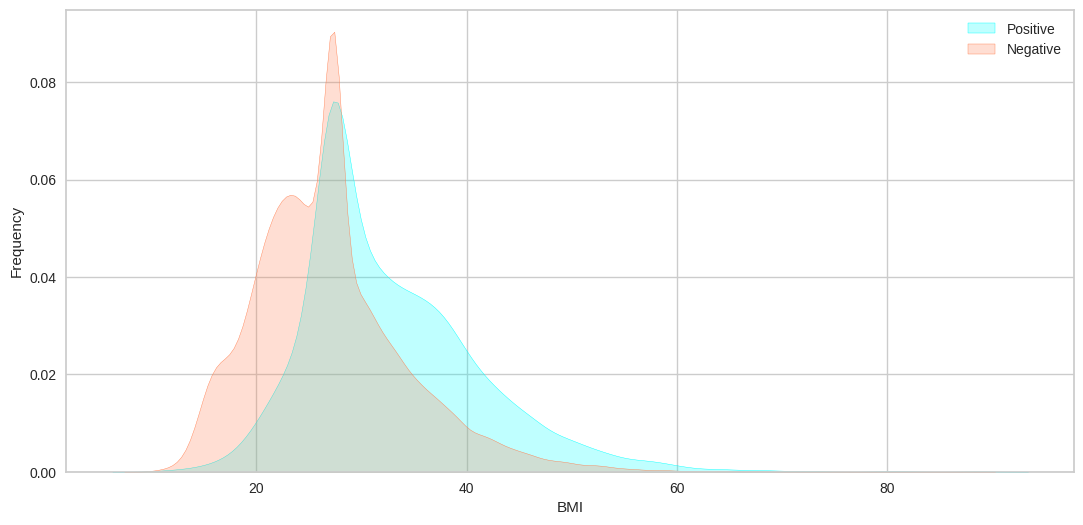

In [ ]:
plt.figure( figsize = ( 13, 6 ) )
g = sns.kdeplot( dataset[ "bmi" ][ dataset[ "diabetes" ] == 1 ],
                color = "Cyan", shade = True )
g = sns.kdeplot( dataset[ "bmi" ][ dataset[ "diabetes" ] == 0 ],
                ax = g, color = "Coral", shade = True )
g.set_xlabel( "BMI" )
g.set_ylabel( "Frequency" )
g.legend( [ "Positive", "Negative" ] )

# POSITIVE = BMI levels that does have diabetes
# NEGATIVE = BMI levels that does NOT have diabetes

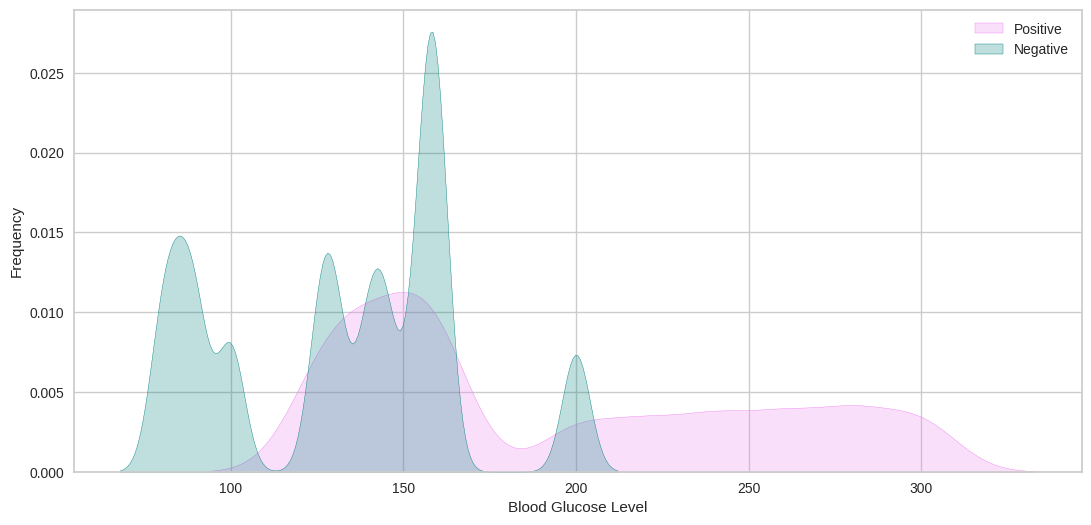

In [ ]:
plt.figure( figsize = ( 13, 6 ) )
g = sns.kdeplot( dataset[ "blood_glucose_level" ][ dataset[ "diabetes" ] == 1 ],
                color = "Violet", shade = True )
g = sns.kdeplot( dataset[ "blood_glucose_level" ][ dataset[ "diabetes" ] == 0 ],
                ax = g, color = "Teal", shade = True )
g.set_xlabel( "Blood Glucose Level" )
g.set_ylabel( "Frequency" )
g.legend( [ "Positive", "Negative" ] )

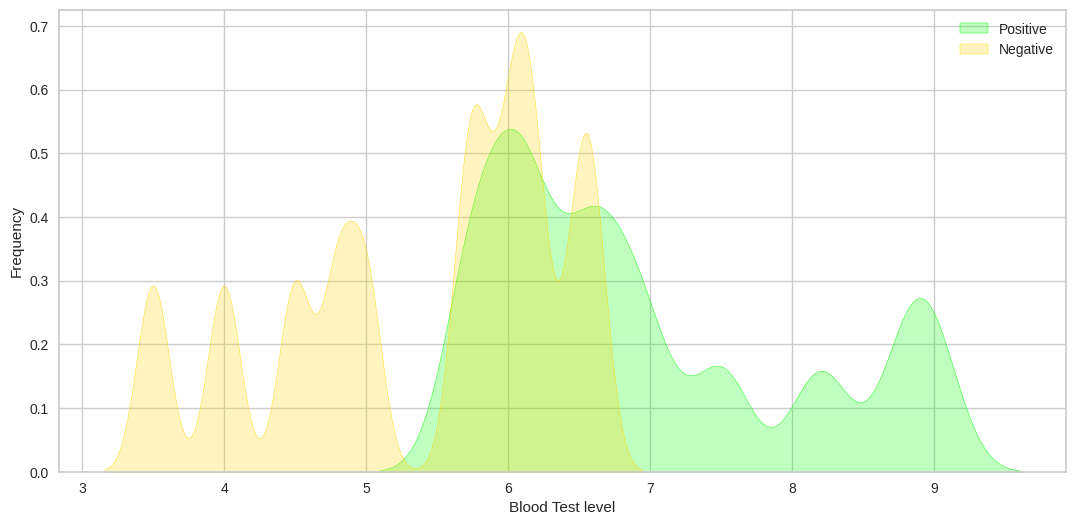

In [ ]:
plt.figure( figsize = ( 13, 6 ) )
g = sns.kdeplot( dataset[ "HbA1c_level" ][ dataset[ "diabetes" ] == 1 ],
                color = "Lime", shade = True )
g = sns.kdeplot( dataset[ "HbA1c_level" ][ dataset[ "diabetes" ] == 0 ],
                ax = g, color = "Gold", shade = True )
g.set_xlabel( "Blood Test level" )
g.set_ylabel( "Frequency" )
g.legend( [ "Positive", "Negative" ] )

<Axes: xlabel='blood_glucose_level', ylabel='bmi'>

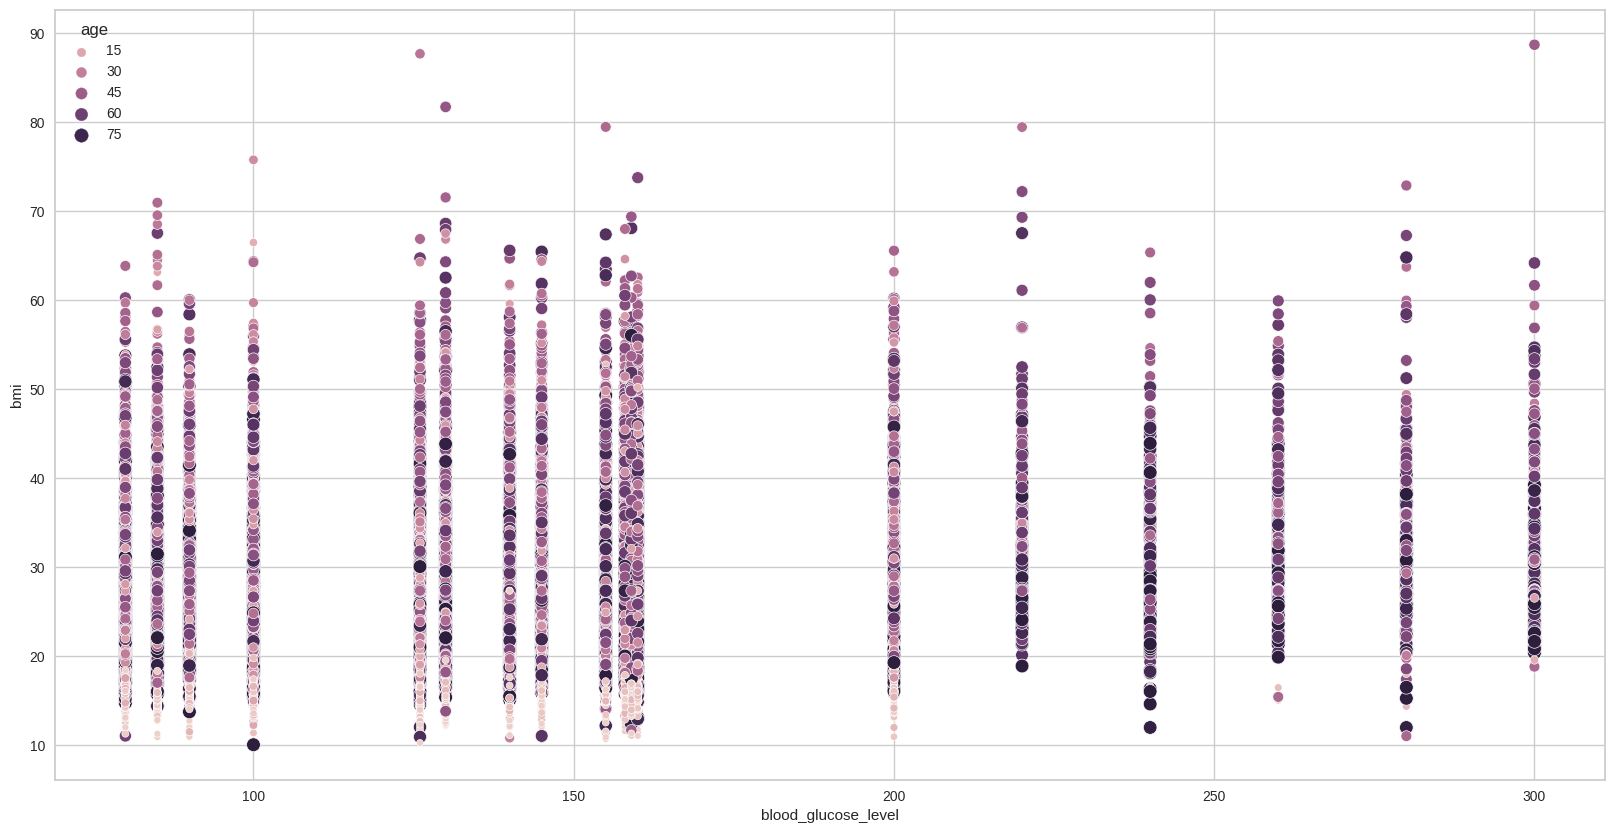

In [ ]:
# GLUCOSE vs BMI vs AGE
plt.figure( figsize = ( 20, 10 ) )
sns.scatterplot( data = dataset, x = "blood_glucose_level", y = "bmi", hue = "age", size = "age" )